In [1]:
import pandas as pd
import math
import matplotlib.pyplot as ply
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df.drop(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis = 1)
df

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
...,...,...,...
886,887,0,27.0
887,888,1,19.0
888,889,0,NaN
889,890,1,26.0


In [4]:
df = df.head(400)  # taking the first 400 entries for regression
df

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
...,...,...,...
395,396,0,22.0
396,397,0,31.0
397,398,0,46.0
398,399,0,23.0


In [5]:
length = len(df.index)
length

400

In [6]:
df = df.dropna()  # removing NaN values
df

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
...,...,...,...
395,396,0,22.0
396,397,0,31.0
397,398,0,46.0
398,399,0,23.0


In [7]:
# We will preform logistic regression with Probability of survival vs Age

X = []   # list to store the Age
for i in range(length):
    try:
        X.append(df.Age[i])
    except:
        pass
X

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 31.0,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 19.0,
 40.0,
 66.0,
 28.0,
 42.0,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 3.0,
 19.0,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 0.83,
 30.0,
 22.0,
 29.0,
 28.0,
 17.0,
 33.0,
 16.0,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 38.0,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 2.0,
 21.0,
 32.5,
 32.5,
 54.0,
 12.0,
 24.0,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,
 36.5,
 42.0,
 51.0,
 22.0,
 55.5,
 40.5,
 51.0,
 16.0,
 30.0,
 44.0,
 40.0,
 26.0,
 17.0,
 1.0,
 9.0,
 45.0,
 28.0,
 61.0,
 4.0,
 1.0,
 21.0,
 56.0,
 18.0,
 50.0,
 30.0,
 36.0,

In [8]:
y = []      
for i in range(length):
    try:
        y.append(df.Survived[i])
    except:
        pass
y

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,


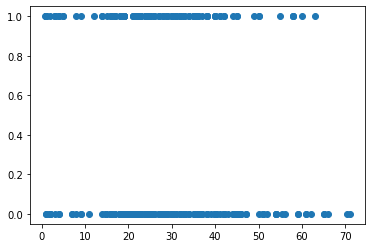

In [9]:
ply.scatter(X,y)

In [11]:
# setting clope, intercept, learning rate and number of iterations
m = 0
c = 0
lr = 0.001
iterations = 10000

In [12]:
# function for gradient descend
def descend(curr, y_pred, y, x = [1.0 for k in range(len(y))]):
    for j in range(len(y)):
        curr -= (lr/len(y)) * (y_pred[j] - y[j]) * x[j]
    return curr

# iterating to perform gradient descend
for i in range(iterations):  
    z = [(m * x_val + c) for x_val in X ]
    y_pred = [ (1 / (1 + math.exp(-1.0 * z_val))) for z_val in z]
    m = descend(m, y_pred, y, X)
    c = descend(c, y_pred, y)

In [13]:
m    # final m value

-0.016046402606155374

In [14]:
c    # final c value

-0.0006262646843348431

In [15]:
z_final = [(m * x_val + c) for x_val in X]
probability_calc = [( 1/(1+math.exp(-1.0*z_val)) ) for z_val in z_final]
probability_calc

[0.41249828377686865,
 0.3519703382909911,
 0.3970354743605162,
 0.36302693084232246,
 0.36302693084232246,
 0.2958514222433813,
 0.49182096217673577,
 0.3932004113717064,
 0.44391800087110966,
 0.48380270066235465,
 0.282657475293079,
 0.42029699570901907,
 0.3483191102075821,
 0.44391800087110966,
 0.29251956791348,
 0.49182096217673577,
 0.3779955684602247,
 0.36302693084232246,
 0.3667455684541472,
 0.43996051552883125,
 0.3893784702859245,
 0.46779527439827673,
 0.3519703382909911,
 0.42421158303432904,
 0.34468561227604827,
 0.25736892290035673,
 0.3893784702859245,
 0.33747314096847003,
 0.4163924084750379,
 0.4281357030536356,
 0.44391800087110966,
 0.34468561227604827,
 0.3932004113717064,
 0.48781104729512625,
 0.42421158303432904,
 0.4281357030536356,
 0.4717922123486524,
 0.4163924084750379,
 0.3128346884401453,
 0.38557007335164384,
 0.26044779548775915,
 0.4163924084750379,
 0.38747255265981456,
 0.47979643704930314,
 0.45583125803018204,
 0.41249828377686865,
 0.35197033

Text(0, 0.5, 'Probability of Survival')

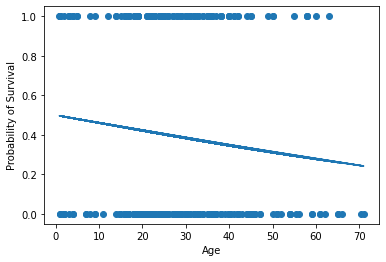

In [16]:
ply.scatter(X,y)

ply.plot(X,probability_calc) # plotting of the probability function
ply.xlabel("Age")
ply.ylabel("Probability of Survival")